# Charting Fundamentals

This module digs deeper into multiple plots with the same figure, interaction, animation and a few more kinds of plots which are useful in data science. 

## 1. Subplots

Thus far we have been using a signal axis object to plot a single graph or figure. Sometimes it is useful to show two complex plot side by side for the viewer to compare. Matplotlib handles this with a single figure

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

`subplot(nrows, ncols, plot_number)`

This sets nrow by ncol grid and sets the plot_number as the current axes.

<IPython.core.display.Javascript object>


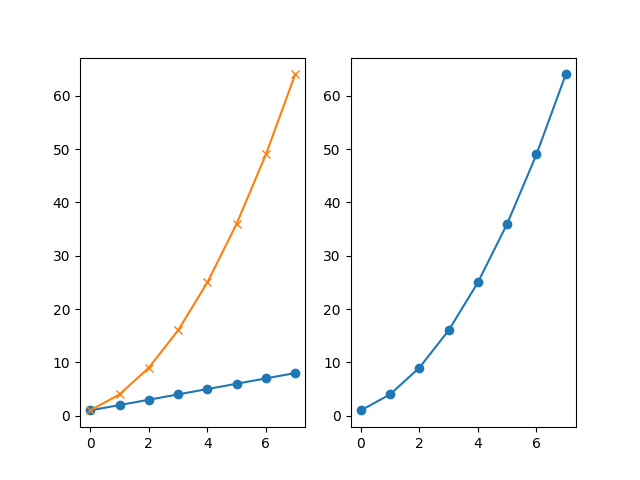

In [2]:
# create a new figure
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)
# data
linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

In [3]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

Now the norm with `matplotlib` is that you store the axis object that you get back from the subplot. But you can call `subplot` again. At any time with the parameters that interest you in order to get back a given axis. 

In [4]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

### Locking y-axis

This demonstrates a common problem, it looked like linear had roughly the same area under the line on the chart until we asked matplotlib to put them into one graph. Then the y axis was refreshed. There would be a big problem with misleading the reader if we didn't find a way to lock axis between two plots. When you create a new subplot you are able to share the x, y, or both axis using the `sharex` and `sharey` parameters. 

<IPython.core.display.Javascript object>


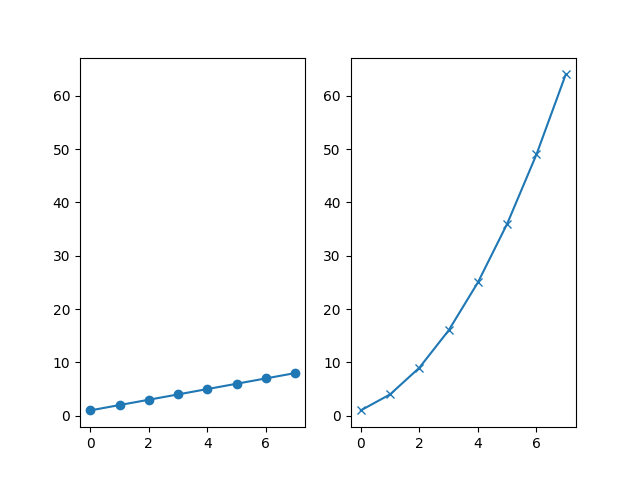

In [5]:
plt.figure()
# create subplot on LHS and store in ax1
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

### Shorthand notation

<IPython.core.display.Javascript object>


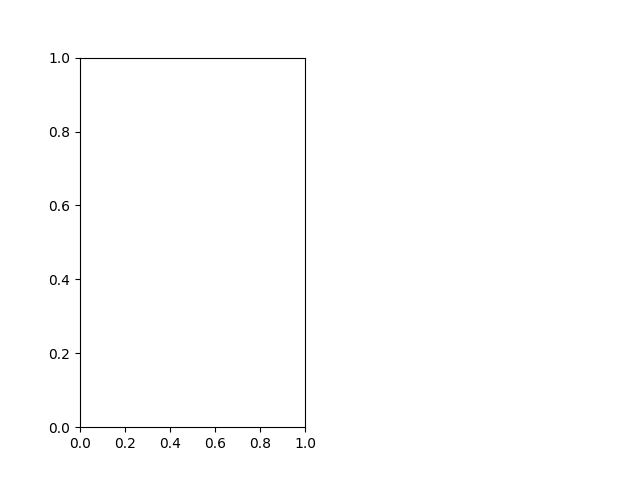

True

In [6]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


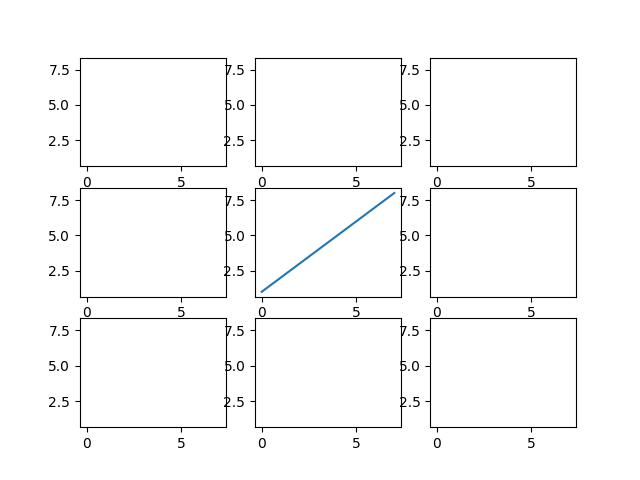

In [7]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

The results however look really nice. Note that this method turns off the y and x labels except for those plots which are on the left hand side or the bottom of the figure. 

If you want to turn the labels back on, you need to iterate through the `axis` objects and do it yourself. You could do this directly through the axis objects you have or iterate through all the axis objects in the figure and change the x and y tick labels to be visible. 

In [10]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [11]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

## 2. Histograms

Histogram is a bar chart that gives a frequency of a given phenomenon

Probability function can be visualized as a curve, where the y-axis holds the probability a given value would occur, and the x-axis is the value itself. This is called a probability density function. The y-axis values are limited to between zero and one, where zero means there's no chance of a given value occurring and one means that the value will always occur. 

The x-axis values are labeled in terms of the distribution function. In the case of the normal distribution, this is usually in terms of standard deviations. So a histogram is just a bar chart where the x-axis is a given observation and the y-axis is the frequency with which that observation occurs. So we should be able to plot a given probability distribution by sampling from it. 

Recall that sampling means that we just pick a number out of the distribution, like rolling a die or pulling a single card out of a deck. As we do this over and over again, we get a more accurate description of the distribution. 

<IPython.core.display.Javascript object>


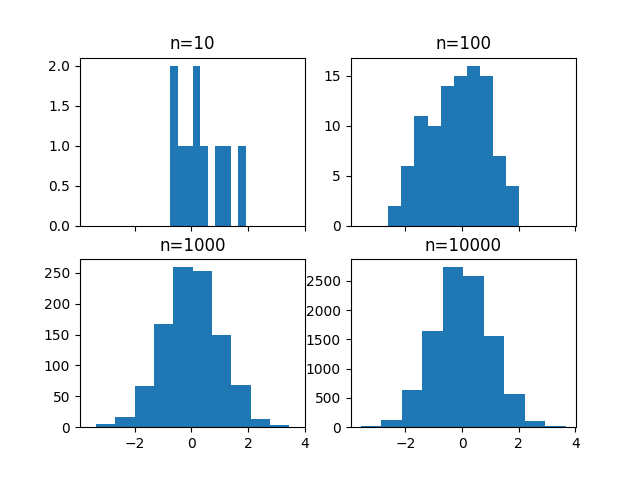

In [12]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


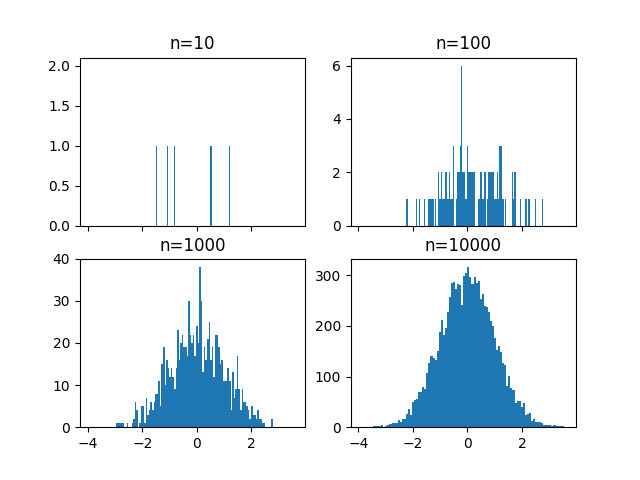

In [13]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

### GridSpec Layout
The GridSpec allows you to map axes over multiple cells in a grid. 

<IPython.core.display.Javascript object>


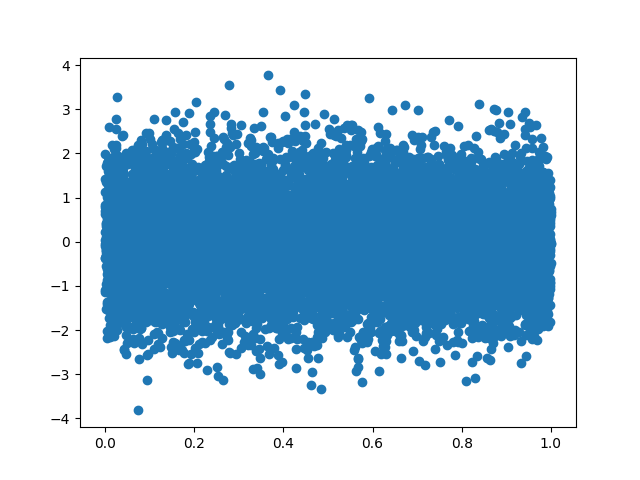

In [14]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


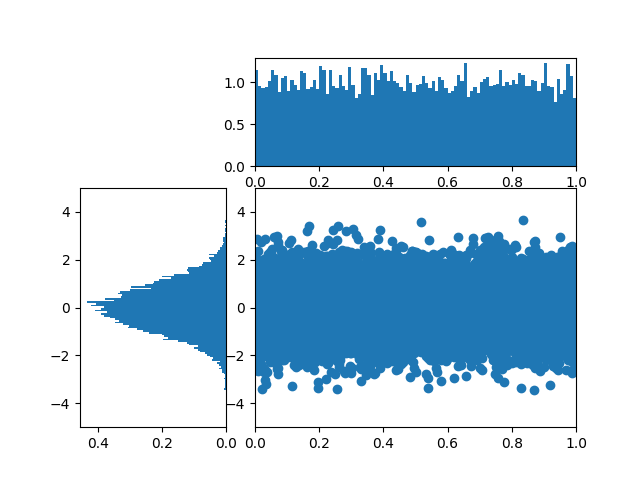

In [15]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

# create a new figure
plt.figure()
# create a 3 x 3 grid 
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [16]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [17]:
# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [18]:
    # change axes limits
    for ax in [top_histogram, lower_right]:
        ax.set_xlim(0, 1)
    for ax in [side_histogram, lower_right]:
        ax.set_ylim(-5, 5)

In [19]:
%%HTML
<img src='http://educationxpress.mit.edu/sites/default/files/journal/WP1-Fig13.jpg' />

# Box and Whisker Plots

A box plot. Sometimes called a box-and-whisker plot is a method of showing aggregate statistics of various samples in a concise matter. The box plot simultaneously shows, for each sample, the median of each value, the minimum and maximum of the samples, and the interquartile range. 

In [20]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [21]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,1.988422,0.000751,0.506380
std,1.409523,1.005947,0.287493
min,0.010203,-3.929124,0.000303
25%,0.942037,-0.680058,0.257511
50%,1.668425,0.010095,0.510048
75%,2.695316,0.673395,0.754185
max,11.946423,3.510689,0.999987


<IPython.core.display.Javascript object>


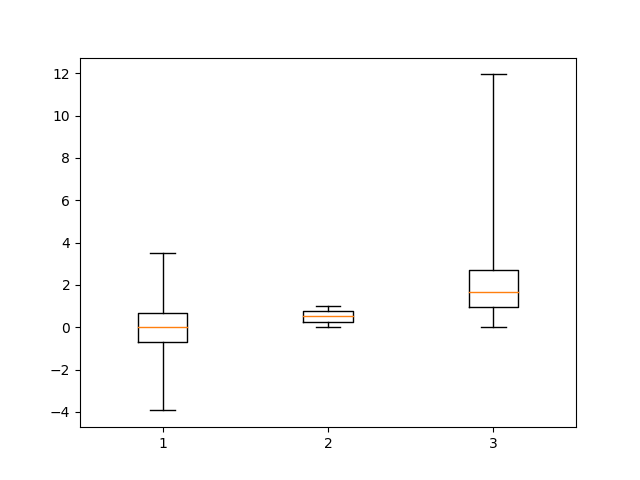

In [22]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis='range')

In [24]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

<IPython.core.display.Javascript object>


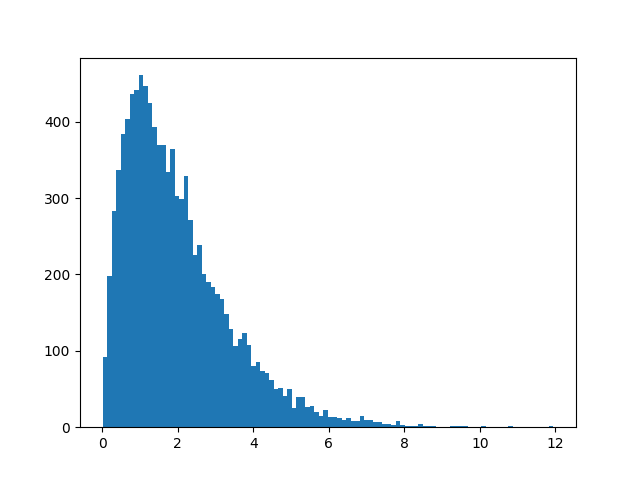

In [25]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


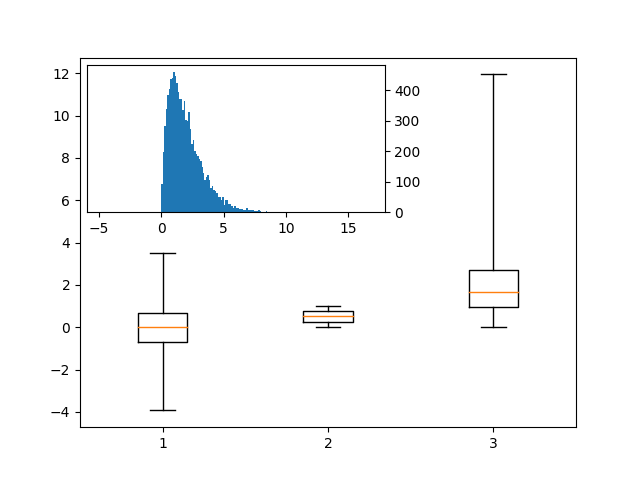

In [26]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [27]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


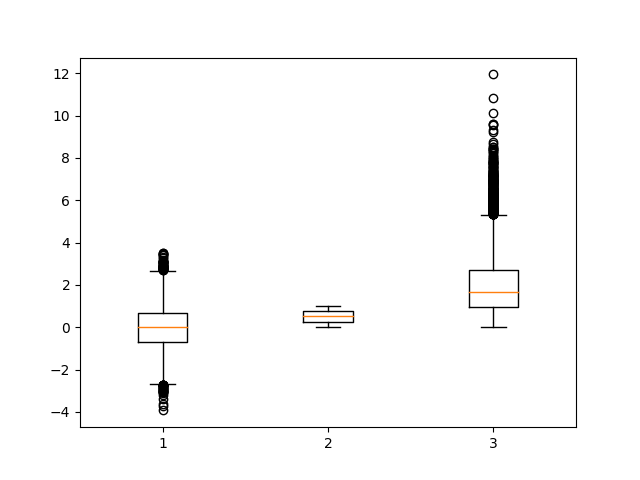

In [28]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

In matplotlib, a heatmap is simply a two-dimensional histogram where the x and the y values indicate potential points and the color plotted is the frequency of the observation. 

<IPython.core.display.Javascript object>


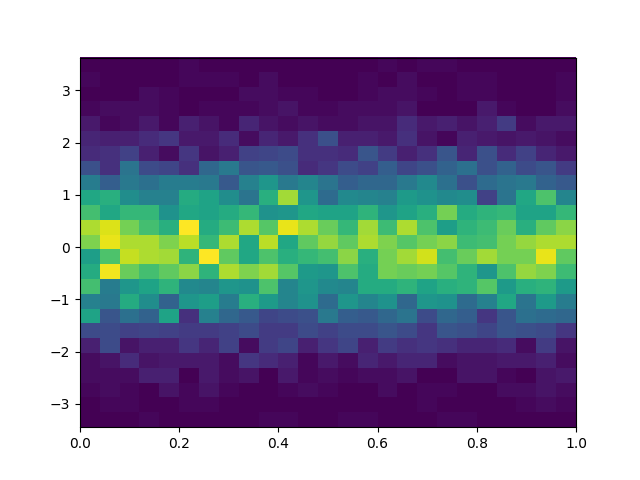

In [29]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

<IPython.core.display.Javascript object>


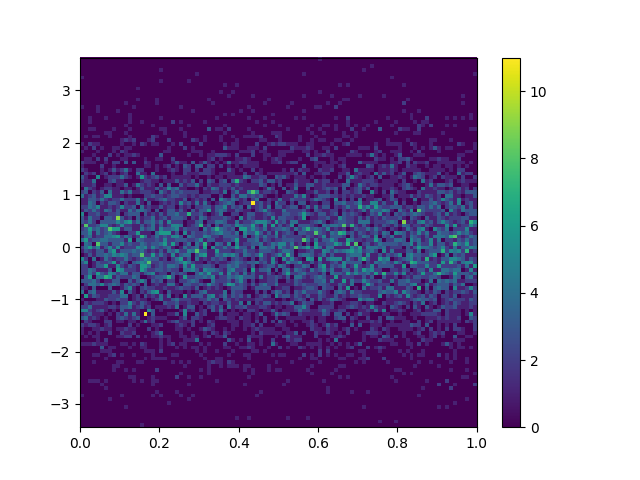

In [30]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

In [31]:
# add a colorbar legend
plt.colorbar()

# Animations

In [32]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [33]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


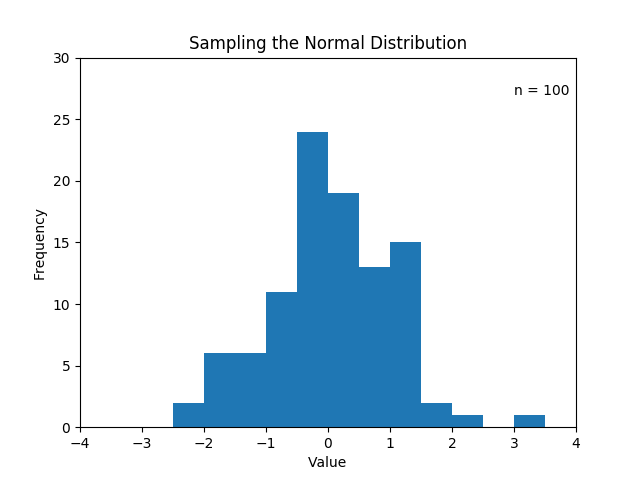

In [34]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

# Interactivity

<IPython.core.display.Javascript object>


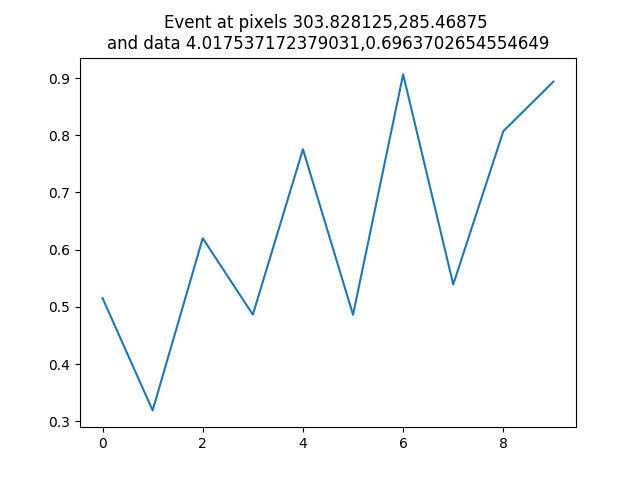

7

In [35]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [36]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,origin,weight
0,0.562674,Mexico,0.331807
1,0.341856,Brazil,0.521014
2,0.507882,USA,0.686717
3,0.005449,China,0.092655
4,0.843241,Chile,0.986741
5,0.422096,Canada,0.781576
6,0.287147,Iraq,0.262651
7,0.557909,Germany,0.446414
8,0.330540,UK,0.435727
9,0.540539,India,0.106425


<IPython.core.display.Javascript object>


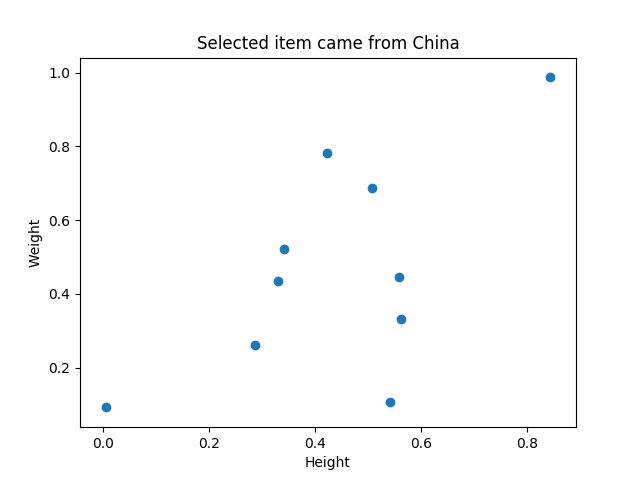

In [37]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [38]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7